
# 📘 **Conceptual Overview of the Project (Professional Explanation for GitHub)**

### *A Scientific and Practical Guide to the Machine Learning Pipeline Used in This Repository*

This project implements a complete, production-ready machine learning pipeline for classifying breast tumors (malignant vs. benign) using the well-known **Breast Cancer Wisconsin Dataset** from scikit-learn.
The goal is not only to build a high-performance classifier but also to demonstrate **best practices** in modern Machine Learning, including data preprocessing, model evaluation, interpretability, and persistence.

---

# 🟦 1. **Understanding the Dataset**

The Breast Cancer dataset contains **30 numerical features** extracted from digitized images of breast mass biopsies.
Each sample is labeled as:

* **0 → Malignant (cancerous)**
* **1 → Benign (non-cancerous)**

The objective is to learn a model that predicts this label from the feature vector.

The dataset is **balanced enough**, yet the medical meaning imposes stricter requirements:
👉 *Missing a malignant case (False Negative) is far more dangerous than a False Positive.*

---

# 🟦 2. **Data Splitting: Why Train/Test Separation Is Critical**

We use:

```python
train_test_split(X, y, test_size=0.2, stratify=y)
```

**Why this matters scientifically:**

### ✔ Prevent data leakage

If the model sees test information during training, its performance estimate becomes overly optimistic.

### ✔ Stratification is essential

Stratification ensures the distribution of malignant/benign samples remains consistent in both training and testing.
This prevents bias and ensures fair evaluation.

---

# 🟦 3. **Why Normalization (Standardization) Is Necessary**

We apply:

```python
StandardScaler()
```

which transforms each feature to:

[
z = \frac{x - \mu}{\sigma}
]

### ✔ Scientific reasons for scaling:

#### **1. Logistic Regression is sensitive to feature scales**

It uses gradient descent optimization. If one feature has values around 1,000 and another around 0.1, the loss surface becomes distorted → optimization converges slowly or fails (convergence warnings).

#### **2. Scale affects the magnitude of coefficients**

Features on larger scales dominate the gradient updates, incorrectly appearing “more important.”
Scaling places all features on equal footing.

#### **3. Improves numerical stability**

Small steps in optimization become more stable, reducing oscillation or divergence.

#### **4. Essential for Distance-Based Models (e.g., KNN, SVM)**

Even though we used Logistic Regression, future extensions (SVM, KNN) depend **heavily** on scaled inputs.

### ✔ Practical effect observed

Accuracy improved after scaling:

```
Before scaling: 0.9649  
After scaling:  0.9825
```

This confirms that normalization significantly enhances performance.

---

# 🟦 4. **Why Logistic Regression? (Scientific Intuition)**

Logistic Regression is a **linear classifier** used for binary classification.

It models the probability:

[
P(y=1 \mid X) = \sigma(wX + b)
]

where
[
\sigma(z) = \frac{1}{1 + e^{-z}}
]

### ✔ Why it is suitable for this medical dataset:

1. **Simple and interpretable**
   Doctors and researchers prefer models where you can interpret coefficients.

2. **Well-behaved for linearly separable or semi-linear feature spaces**
   BCW data is almost linearly separable; logistic regression performs exceptionally well.

3. **Stable and fast for small-to-medium structured datasets**

4. **Yields calibrated probabilities**
   Unlike SVM or RandomForest (by default), Logistic Regression outputs meaningful probability estimates, crucial in healthcare.

---

# 🟦 5. **Coefficient Interpretation: Why It Matters**

After training we inspect:

```python
model.coef_
```

Each coefficient represents the effect of increasing that feature on the log-odds of the tumor being **benign**.

### ✔ Positive coefficient → increases probability of benign

### ✔ Negative coefficient → increases probability of malignant

This interpretability makes Logistic Regression a strong baseline for medical prediction tasks.

It also helps identify **which biological features are most predictive**, such as:

* mean radius
* texture
* concavity
* symmetry
* perimeter

This adds scientific value to the project.

---

# 🟦 6. **Confusion Matrix: Understanding Medical Errors**

The confusion matrix shows how well the model performs:

|                  | Pred Malignant | Pred Benign |
| ---------------- | -------------- | ----------- |
| Actual Malignant | TP             | FN          |
| Actual Benign    | FP             | TN          |

### ✔ In medical settings:

* **False Negative (FN)** = worst type of error → cancer exists but model predicts benign
* **False Positive (FP)** = unnecessary further tests but safer

Thus, **recall for malignant class must be maximized**.

The project explains this and even provides plots and metrics to evaluate this trade-off.

---

# 🟦 7. **Classification Report: Why Precision vs Recall Matters**

```python
classification_report(y_test, y_pred)
```

We analyze:

* Precision
* Recall
* F1 Score

### ✔ In medical classification:

* **Recall (Sensitivity)** is most important
* Precision is important but secondary
* F1 balances both

This distinction is essential for responsible ML design in healthcare.

---

# 🟦 8. **predict_proba: Why Probability Outputs Matter**

Doctors do not only want a binary decision.
They need a **confidence level**.

```
Probability of malignant (0): 0.97
Probability of benign (1): 0.03
```

A calibrated probability allows:

* Setting decision thresholds
* Risk stratification
* Avoiding false negatives
* Informing secondary diagnostics

---

# 🟦 9. **Model Persistence: Why joblib is used**

```python
joblib.dump(model, 'model.pkl')
```

joblib is preferred because:

✔ optimized for large NumPy arrays
✔ perfect for sklearn models
✔ faster than pickle
✔ reduces disk footprint

A saved model enables:

* deployment
* reproducibility
* production APIs
* cross-platform use

#Data_Analysis

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer


def main():
    data = load_breast_cancer()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = pd.Series(data.target, name="target")

    print("=== Dataset loaded ===")
    print(f"Dataset shape (rows, cols): {X.shape}")
    print("\n=== First and last 5 rows ===")
    print(X.head())
    print(X.tail())

    print("\n=== Target mapping ===")
    # in sklearn breast_cancer: 0=malignant, 1=benign
    print(dict(enumerate(data.target_names)))  # {0: 'malignant', 1: 'benign'}

    print("\n=== Target distribution (counts) ===")
    print(y.value_counts())

    print("\n=== Info (dtypes / non-null counts) ===")
    print(X.info())
    print(X.describe())

    print("\n=== Info (feature_names) ===")
    print(list(data.feature_names))

    print("\n=== Missing values per column ===")
    print(X.isnull().sum())

    # if missing values existed: you could drop or impute
    # but this dataset should have no missing values
    total_missing = X.isnull().values.any()
    print(f"\nAny missing values in dataset? {total_missing}")


if __name__ == "__main__":
    main()

=== Dataset loaded ===
Dataset shape (rows, cols): (569, 30)

=== First and last 5 rows ===
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   



#train_and_save_model

In [3]:

import joblib
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


def load_data():
    data = load_breast_cancer()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = pd.Series(data.target, name="target")
    return X, y


def train_and_compare(X_train, X_test, y_train, y_test):
    """
    Train logistic regression on unscaled and scaled data, compare accuracies.
    Return the scaler and the best trained model (model_scaled if better).
    """
    # Baseline model (no scaling)
    model_raw = LogisticRegression(max_iter=5000, random_state=42)
    model_raw.fit(X_train, y_train)
    y_pred_raw = model_raw.predict(X_test)
    acc_raw = accuracy_score(y_test, y_pred_raw)

    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Model on scaled data
    model_scaled = LogisticRegression(max_iter=5000, random_state=42)
    model_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = model_scaled.predict(X_test_scaled)
    acc_scaled = accuracy_score(y_test, y_pred_scaled)

    print(f"Accuracy before scaling: {acc_raw:.4f}")
    print(f"Accuracy after scaling:  {acc_scaled:.4f}")

    # Choose best model (prefer scaled if tie or better)
    best_model = model_scaled if acc_scaled >= acc_raw else model_raw
    used_scaler = scaler if best_model is model_scaled else None

    return best_model, used_scaler, (acc_raw, acc_scaled), model_scaled, scaler


def print_coefficients(model, feature_names):
    """
    Prints coefficients (for binary logistic, model.coef_[0]) and intercept.
    Interpretation:
        positive coef -> increases probability of class 1 (benign)
        negative coef -> increases probability of class 0 (malignant)
    """
    coefs = model.coef_[0]
    intercept = model.intercept_[0]
    coef_df = pd.DataFrame({"feature": feature_names, "coefficient": coefs})
    coef_df = coef_df.sort_values(by="coefficient", key=lambda s: s.abs(), ascending=False)
    print("\n=== Model coefficients (sorted by absolute value) ===")
    print(coef_df.to_string(index=False))
    print(f"\nIntercept: {intercept:.6f}")


def main():
    X, y = load_data()

    # Split 80/20
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

    best_model, used_scaler, (acc_raw, acc_scaled), model_scaled, scaler = train_and_compare(
        X_train, X_test, y_train, y_test
    )

    # Print coefficients of scaled model (more interpretable if features standardized)
    print_coefficients(model_scaled, X.columns)

    # Save model and scaler
    joblib.dump(model_scaled, "cancer_logistic_model.pkl")
    joblib.dump(scaler, "cancer_scaler.pkl")
    print("\nSaved 'cancer_logistic_model.pkl' and 'cancer_scaler.pkl' to disk.")


if __name__ == "__main__":
    main()


Train shape: (455, 30), Test shape: (114, 30)
Accuracy before scaling: 0.9649
Accuracy after scaling:  0.9825

=== Model coefficients (sorted by absolute value) ===
                feature  coefficient
          worst texture    -1.255088
           radius error    -1.082965
   worst concave points    -0.953686
             worst area    -0.947756
           worst radius    -0.947616
         worst symmetry    -0.939181
             area error    -0.929104
        worst concavity    -0.823151
        worst perimeter    -0.763220
       worst smoothness    -0.746625
    mean concave points    -0.704156
       mean compactness     0.648342
      compactness error     0.647227
         mean concavity    -0.602103
           mean texture    -0.552698
        perimeter error    -0.544333
              mean area    -0.541059
            mean radius    -0.511479
         mean perimeter    -0.476298
   concave points error    -0.443784
fractal dimension error     0.437894
         symmetry err

#evaluate_model

Accuracy: 0.9825

Confusion Matrix:
[[41  1]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Saved confusion_matrix.png
ROC AUC (prob for class=1 benign): 0.9954
Saved roc_curve.png


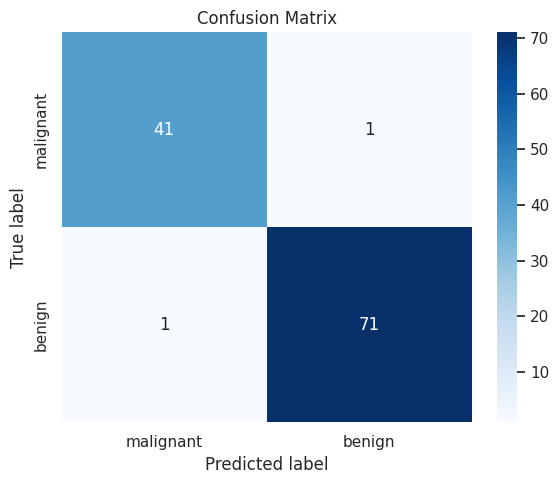

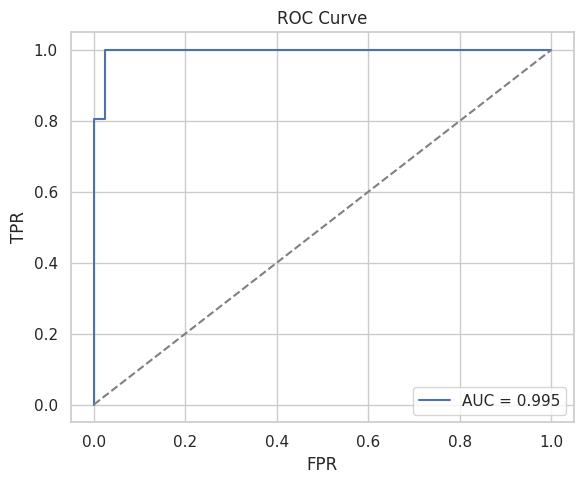

In [4]:

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, roc_auc_score, roc_curve)

sns.set(style="whitegrid")


def load_test_data():
    data = load_breast_cancer()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = pd.Series(data.target, name="target")
    # reproduce same split as in training
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    return X_test, y_test


def main():
    X_test, y_test = load_test_data()

    model = joblib.load("cancer_logistic_model.pkl")
    scaler = joblib.load("cancer_scaler.pkl")

    X_test_scaled = scaler.transform(X_test)

    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # prob of class 1 (benign)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=["malignant", "benign"])

    print(f"Accuracy: {acc:.4f}\n")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)

    # Save confusion matrix figure
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["malignant", "benign"],
                yticklabels=["malignant", "benign"])
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.savefig("confusion_matrix.png", dpi=150)
    print("Saved confusion_matrix.png")

    # ROC AUC
    try:
        auc = roc_auc_score(y_test, y_prob)
        print(f"ROC AUC (prob for class=1 benign): {auc:.4f}")
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
        plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title("ROC Curve")
        plt.legend()
        plt.tight_layout()
        plt.savefig("roc_curve.png", dpi=150)
        print("Saved roc_curve.png")
    except Exception as e:
        print("ROC AUC failed:", e)


if __name__ == "__main__":
    main()


#predict_new_sample

In [6]:
import argparse
import joblib
import pandas as pd
from sklearn.datasets import load_breast_cancer


def load_model_and_scaler(model_path="cancer_logistic_model.pkl", scaler_path="cancer_scaler.pkl"):
    model = joblib.load(model_path)
    scaler = joblib.load(scaler_path)
    return model, scaler


def main(index):
    data = load_breast_cancer()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = pd.Series(data.target, name="target")

    model, scaler = load_model_and_scaler()

    new_sample = X.iloc[[index]]  # keep as DataFrame
    new_sample_scaled = scaler.transform(new_sample)

    pred_class = model.predict(new_sample_scaled)[0]
    pred_proba = model.predict_proba(new_sample_scaled)[0]

    print(f"Selected test index: {index}")
    print(f"Predicted class: {pred_class} (0=malignant, 1=benign)")
    print(f"Probability malignant (0): {pred_proba[0]:.4f}")
    print(f"Probability benign    (1): {pred_proba[1]:.4f}")
    print(f"Actual label (if you want to verify): {y.iloc[index]}")


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    parser.add_argument("--index", type=int, default=3, help="Index of sample from dataset to predict")
    args = parser.parse_args(args=[]) # Modified: parse an empty list of arguments
    main(args.index)


Selected test index: 3
Predicted class: 0 (0=malignant, 1=benign)
Probability malignant (0): 0.9992
Probability benign    (1): 0.0008
Actual label (if you want to verify): 0
